In [3]:
!pip3 install pandas-gbq -U
!pip3 install pandas
!pip3 install pandasql
!pip3 install google-cloud-bigquery --upgrade

Requirement already up-to-date: pandas-gbq in /usr/local/envs/py3env/lib/python3.5/site-packages (0.9.0)
Requirement already up-to-date: google-cloud-bigquery in /usr/local/envs/py3env/lib/python3.5/site-packages (1.9.0)


In [2]:
import pandas as pd

df2005 = pd.read_csv("./data/donneesouvertes-interventions-sim-2005-2014.csv") 
#df2005=df2005.rename(columns = {'INCIDENT_NBR':'incident_nbr', 'CREATION_DATE_TIME':'creation_date_time', 'INCIDENT_TYPE_DESC':'incident_type_desc', 'DESCRIPTION_GROUPE':'description_groupe','CASERNE'})
df2005.columns = [x.lower() for x in df2005.columns]
df2005.head(n=5)

,incident_nbr,creation_date_time,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites
0,1,2005-01-01 00:03:47,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.620274,-73.619956,1.0
1,2,2005-01-01 00:03:56,Alarme privé ou locale,Alarmes-incendies,10,Montréal,Ville-Marie / Parc Jean-Drapeau / Centre-Sud,18,45.494087,-73.582587,7.0
2,3,2005-01-01 00:03:57,Alarme privé ou locale,Alarmes-incendies,72,Saint-Laurent,St-Laurent,13,45.484406,-73.693038,6.0
3,4,2005-01-01 00:05:01,Inondation,Sans incendie,13,Montréal,Mercier / Hochelaga-Maisonneuve,23,45.541383,-73.545944,1.0
4,5,2005-01-01 00:06:20,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.611304,-73.632440,1.0


In [3]:
df2015 = pd.read_csv("./data/donneesouvertes-interventions-sim.csv") 
df2015.head(n=5)

,incident_nbr,creation_date_time,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites
0,1,2015-01-01 00:03:22,Inondation,Sans incendie,26,Montréal,Plateau Mont-Royal,11,45.535698,-73.580575,1.0
1,2,2015-01-01 00:05:58,Ac.véh./1R/s.v./ext/29B/D,Premier répondant,25,Montréal,Ville-Marie,10,45.494499,-73.574247,2.0
2,3,2015-01-01 00:08:34,Appel de Cie de détection,Alarmes-incendies,64,Montréal,Lachine,7,45.442005,-73.665779,3.0
3,4,2015-01-01 00:11:28,Premier répondant,Premier répondant,38,Montréal,Rivière-des-Prairies / Pointe-aux-Trembles,6,45.641294,-73.489981,1.0
4,5,2015-01-01 00:14:06,Odeur suspecte - gaz,Sans incendie,34,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,9,45.483883,-73.615028,2.0


In [4]:
print(df2005.shape)
print(df2015.shape)
df = df2005.append(df2015, ignore_index=True)
print(df.shape)

(908486, 11)
(390201, 11)
(1298687, 11)


In [5]:
import datetime

df['creation_date_time'] = pd.to_datetime(df['creation_date_time'])

L = ['year', 'month', 'day', 'hour', 'dayofweek']
df = df.join(pd.concat((getattr(df['creation_date_time'].dt, i).rename(i) for i in L), axis=1))

df['dayofweek'] = df.apply(lambda row: datetime.date(row['year'], row['month'], row['day']).weekday(), axis=1)

df.head(n=5)

,incident_nbr,creation_date_time,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites,year,month,day,hour,dayofweek
0,1,2005-01-01 00:03:47,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.620274,-73.619956,1.0,2005,1,1,0,5
1,2,2005-01-01 00:03:56,Alarme privé ou locale,Alarmes-incendies,10,Montréal,Ville-Marie / Parc Jean-Drapeau / Centre-Sud,18,45.494087,-73.582587,7.0,2005,1,1,0,5
2,3,2005-01-01 00:03:57,Alarme privé ou locale,Alarmes-incendies,72,Saint-Laurent,St-Laurent,13,45.484406,-73.693038,6.0,2005,1,1,0,5
3,4,2005-01-01 00:05:01,Inondation,Sans incendie,13,Montréal,Mercier / Hochelaga-Maisonneuve,23,45.541383,-73.545944,1.0,2005,1,1,0,5
4,5,2005-01-01 00:06:20,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.611304,-73.632440,1.0,2005,1,1,0,5


In [6]:
df.shape

(1298687, 16)

In [7]:
df1 = df[df['year'] > 2008]
df1.head(n=5)

,incident_nbr,creation_date_time,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites,year,month,day,hour,dayofweek
233262,1,2009-01-01 00:05:54,Premier répondant,Premier répondant,21,Montréal,Saint-Léonard,20,45.597608,-73.590636,1.0,2009,1,1,0,3
233263,2,2009-01-01 00:13:35,Feu d'auto (voie rapide),Autres incendies,21,Montréal,Saint-Léonard,20,45.589048,-73.583035,4.0,2009,1,1,0,3
233264,3,2009-01-01 00:15:53,Premier répondant,Premier répondant,44,Montréal,Rivière-des-Prairies / Pointe-aux-Trembles,25,45.659890,-73.553549,1.0,2009,1,1,0,3
233265,4,2009-01-01 00:34:54,Feu de champ *,Autres incendies,38,Montréal,Rivière-des-Prairies / Pointe-aux-Trembles,25,45.691522,-73.495249,1.0,2009,1,1,0,3
233266,5,2009-01-01 00:41:48,Appel de Cie de détection,Alarmes-incendies,17,Montréal,Montréal-Nord,21,45.595582,-73.644351,3.0,2009,1,1,0,3


In [8]:
df = df1
print(df.shape)

(1065425, 16)


In [10]:
countsDataFrame = df.groupby(['year', 'month', 'day', 'hour', 'dayofweek']).size().reset_index(name='counts')

In [11]:
countsDataFrame.head(n=5)

,year,month,day,hour,dayofweek,counts
0,2009,1,1,0,3,8
1,2009,1,1,1,3,18
2,2009,1,1,2,3,13
3,2009,1,1,3,3,14
4,2009,1,1,4,3,9


In [12]:
#filteredCountsDF = countsDataFrame[countsDataFrame['year'].isin([2015, 2016, 2017])]
filteredCountsDF = countsDataFrame
filteredCountsDF.shape

(80784, 6)

In [27]:
X = filteredCountsDF.drop(['counts', 'year', 'day'], axis=1)
y = filteredCountsDF['counts']
X.head(5)

,month,hour,dayofweek
0,1,0,3
1,1,1,3
2,1,2,3
3,1,3,3
4,1,4,3


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
y_pred = regressor.predict(X_test) 
resultDF=pd.DataFrame({'Actual incident #':y_test, 'Predicted incident #':y_pred})  
resultDF.head(10)

,Actual incident #,Predicted incident #
37576,13,14.440000
37738,12,15.206897
68864,5,6.730769
11384,5,12.870968
31395,5,5.310345
64258,7,5.333333
9245,13,18.222222
53384,9,11.000000
15100,13,13.612903
9841,13,17.882353


In [31]:
from sklearn import metrics 
import numpy as np
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 3.3064858180751604
Mean Squared Error: 20.36490607219457
Root Mean Squared Error: 4.512749280892367
R2_score:  0.463491964032559


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


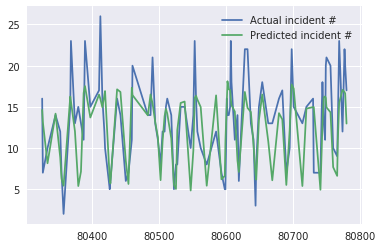

In [33]:
resultDF.sort_index()[-100:].plot()